# 1. Dataset Preparation 

In [296]:
import arff
import numpy as np
import pandas as pd

def readCeserianFile(filePath):
    # read arff data
    with open(filePath) as f:
        # load reads the arff db as a dictionary with
        # the data as a list of lists at key "data"
        dataDictionary = arff.load(f)
        f.close()
        
    # extract data and convert to numpy array
    arffData = np.array(dataDictionary['data'])
    arffAttributes = [i[0] for i in dataDictionary['attributes']]

    return pd.DataFrame(arffData, columns=arffAttributes) 

df = readCeserianFile("caesarian.csv.arff")
df

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [297]:
df.describe()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
count,80,80,80,80,80,80
unique,22,4,3,3,2,2
top,26,1,0,1,0,1
freq,10,41,46,40,50,46


# 2. Preparing Algorithms

In [315]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from mixed_naive_bayes import MixedNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
def read_data_return_frame(filename):
    dataframe = readCeserianFile(filename)
    feature_names = list(dataframe.columns)[:-1]

    #   return all column except last one for arttributes
    x = dataframe.iloc[:, 0: -1:1].values

    #   return last column for label ceserian yes(1) / no(0)
    y = dataframe.iloc[:, -1]
    y, class_names = pd.factorize(y)

    return x, y, class_names, feature_names

In [274]:
def train_test_classifier(x, y, test_size=0.25, classifier="Multinomial"):

    x_train, x_test, y_train, y_test = \
        model_selection.train_test_split(x, y, test_size=test_size, stratify=y, random_state=42)
    
    param_grid = [{'alpha': [0.1, 0.25,0.5,0.75, 1.0, 1.5, 5, 10]}]
     
    if classifier in ('Gaussian','Categorical'):      
        
        if classifier == 'Gaussian':
            classifier = GaussianNB()
            classifier.fit(x_train, y_train)
            print('Classes: ', classifier.classes_)
            print('Class Priors: ',classifier.class_prior_)        
        elif classifier == "Categorical":
            classifier = CategoricalNB()
            classifier.fit(x_train, y_train)
            print('Classes: ', classifier.classes_)
            print('Class Log Priors: ',classifier.class_log_prior_)
    else:
        if classifier == "Multinomial":
            classifier = MultinomialNB()
        elif classifier == "Complement":
            classifier = ComplementNB() 
        elif classifier == "Bernoulli":
            classifier = BernoulliNB()

        grid_search = GridSearchCV(classifier, param_grid, cv=5, verbose=2)
        grid_search.fit(x_train, y_train)   
        classifier = grid_search.best_estimator_
        print(classifier)
        classifier.fit(x_train, y_train)
        print('Classes: ', classifier.classes_)
        print('Class Log Priors: ',classifier.class_log_prior_)
    return x_train, x_test, y_train, y_test, classifier

In [152]:
def prediction(classifier, x):
    # Model prediction on given set
    # y_pred = classifier.predict(x)
    y_pred = classifier.predict(x)
    return y_pred

In [259]:
def accuracy_cm_report(y, y_pred, class_names=[]):

    accuracy = sklearn.metrics.accuracy_score(y, y_pred)
    print("Accuracy: {:.2f}".format(accuracy))

    cm = sklearn.metrics.confusion_matrix(y, y_pred)
    print(sklearn.metrics.classification_report(y, y_pred, target_names=class_names))
    
    print('Confusion Matrix: \n', cm)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, cmap = "BuPu",
                ax=ax)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [154]:
x, y, class_names, feature_names = read_data_return_frame("caesarian.csv.arff")

# 3. Testing the various algorithms 

For this particular dataset, the categorical and mixed algorithms are likely to perform the best as the input data type is best suited to the model (To do: elaborate further)

https://www.inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E
https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069
http://www2.aueb.gr/users/ion/docs/ceas2006_paper.pdf
https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b
https://scikit-learn.org/stable/modules/naive_bayes.html
https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-naive-bayes
https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea/58428035#58428035
https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
https://geoffruddock.com/naive-bayes-from-scratch-with-numpy/
https://towardsdatascience.com/a-short-tutorial-on-naive-bayes-classification-with-implementation-2f69183d8ce1
https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431
https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

## Multinomial Naive Bayes 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ....................................... alpha=0.25, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


--------------------------------------------------------
Accuracy Report for Testing
Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.50      0.55      0.52        11

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20

Confusion Matrix: 
 [[3 6]
 [5 6]]


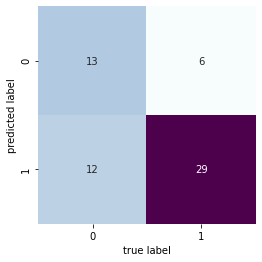

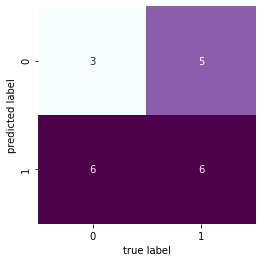

In [323]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(x, y, test_size=0.25)
print('--------------------------------------------------------')
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_multinomial = classifier.predict_proba(x_test)[:,1]

## Gaussian Naive Bayes

Classes:  [0 1]
Class Priors:  [0.41666667 0.58333333]
--------------------------------------------------------
Accuracy Report for Training
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.66      0.76      0.70        25
           1       0.81      0.71      0.76        35

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.74        60

Confusion Matrix: 
 [[19  6]
 [10 25]]
--------------------------------------------------------
Accuracy Report for Testing
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.75      0.55      0.63        11

    accuracy                           0.65        20
   macro avg       0.67      0.66      0.65        20
weighted avg       0.68      0.65      0.65        20

Confusion Matrix: 
 [[7 2]
 [5 6]]


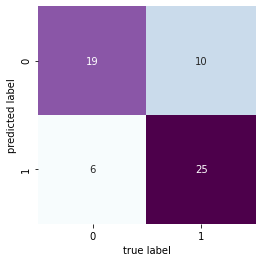

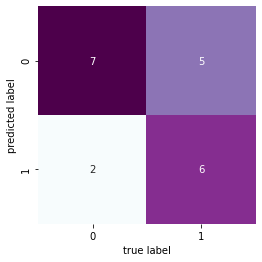

In [324]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(x, y, test_size=0.25, classifier="Gaussian")
print('--------------------------------------------------------')
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_gaussian = classifier.predict_proba(x_test)[:,1]

## Bernoulli Naive Bayes Model

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ....................................... alpha=0.25, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.57      0.73      0.64        11

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20

Confusion Matrix: 
 [[3 6]
 [3 8]]


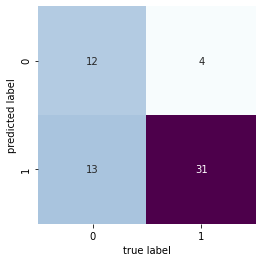

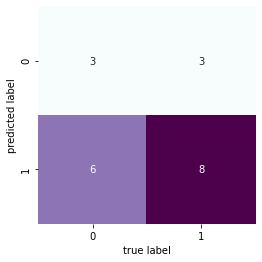

In [325]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(x, y, test_size=0.25, classifier="Bernoulli")
print('--------------------------------------------------------')
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_bernoulli = classifier.predict_proba(x_test)[:,1]

## Complement Naive Bayes Model

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ....................................... alpha=0.25, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


--------------------------------------------------------
Accuracy Report for Testing
Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.50      0.55      0.52        11

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20

Confusion Matrix: 
 [[3 6]
 [5 6]]


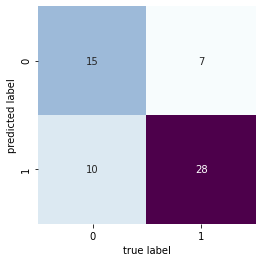

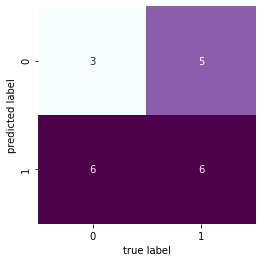

In [326]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(x, y, test_size=0.25, classifier="Complement")
print('--------------------------------------------------------')
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_complement = classifier.predict_proba(x_test)[:,1]

## Categorical Naive Bayes

Note to self: For this and MixedNB, unable to get the cross validation for tuning hyperparameter to work for now

In [327]:
df1 = df.apply(pd.to_numeric)

# Bin continuous vairbales into 20% quantiles
df1['Age_Quantile'] = pd.qcut(df1['Age'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])

In [328]:
df1

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian,Age_Quantile
0,22,1,0,2,0,0,bottom 20
1,26,2,0,1,0,1,lower 20
2,26,2,1,1,0,0,lower 20
3,28,1,0,2,0,0,middle 20
4,22,2,0,1,0,1,bottom 20
...,...,...,...,...,...,...,...
75,27,2,1,1,0,0,middle 20
76,33,4,0,1,0,1,top 20
77,29,2,1,2,0,1,middle 20
78,25,1,2,0,0,1,lower 20


In [329]:
from sklearn.preprocessing import OrdinalEncoder

df_x =df1[['Age_Quantile', 'Delivery number', 'Delivery time', 'Blood of Pressure', 'Heart Problem']]
df_y = df1[['Caesarian']]

enc = OrdinalEncoder()
df_x = enc.fit_transform(df_x)

### Subsection bit on checking multicollinearity of features, should be moved to data exploration eventually

In [369]:
features = df1.columns.tolist()
features.remove('Caesarian')
features.remove('Age_Quantile')
features

['Age',
 'Delivery number',
 'Delivery time',
 'Blood of Pressure',
 'Heart Problem']

In [374]:
df2 = pd.DataFrame(data = df_x, columns = features )
df2

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem
0,0.0,0.0,0.0,2.0,0.0
1,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0
3,2.0,0.0,0.0,2.0,0.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
75,2.0,1.0,1.0,1.0,0.0
76,3.0,3.0,0.0,1.0,0.0
77,2.0,1.0,1.0,2.0,0.0
78,1.0,0.0,2.0,0.0,0.0


In [375]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(features))]
vif["Features"] = features
vif 
# Value of 1 means no correlation, values >4-5 usually viewed as moderate to high. This is to check if the naive
# assumption is likely to hold/be correct, or will cause problems

,VIF,Features
0,3.032727,Age
1,2.099266,Delivery number
2,1.353627,Delivery time
3,2.155432,Blood of Pressure
4,1.683957,Heart Problem


/Users/clement/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classes:  [0 1]
Class Log Priors:  [-0.87546874 -0.5389965 ]
--------------------------------------------------------
Accuracy Report for Training
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.77      0.86      0.81        35

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60

Confusion Matrix: 
 [[16  9]
 [ 5 30]]
--------------------------------------------------------
Accuracy Report for Testing
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.80      0.73      0.76        11

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20

Confusion Matrix: 
 [[7 2]
 [3 8]]


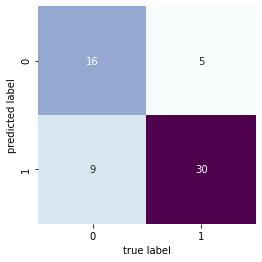

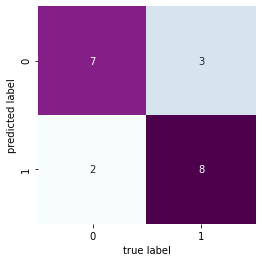

In [330]:
x_train, x_test, y_train, y_test, classifier = train_test_classifier(df_x, df_y, test_size=0.25, classifier="Categorical")
print('--------------------------------------------------------')
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_categorical = classifier.predict_proba(x_test)[:,1]

## Mixed Naive Bayes

https://github.com/remykarem/mixed-naive-bayes

In [343]:
x_train, x_test, y_train, y_test = \
        model_selection.train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [344]:
x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

In [345]:
# NOTE: Technically should be using OrdinalEncoder for categorical features, change this later - although the final
# result of doing this way is the same

label_encoder = LabelEncoder() 
x_train[:,1] = label_encoder.fit_transform(x_train[:,1])
x_train[:,2] = label_encoder.fit_transform(x_train[:,2])
x_train[:,3] = label_encoder.fit_transform(x_train[:,3])
x_train[:,4] = label_encoder.fit_transform(x_train[:,4])
print(x_train)

[[20  0  0  2  1]
 [22  0  2  2  0]
 [21  0  0  0  0]
 [26  0  0  2  0]
 [17  0  0  0  0]
 [25  0  0  0  0]
 [29  1  1  2  0]
 [35  0  1  0  0]
 [22  0  0  1  0]
 [37  2  0  1  1]
 [33  0  1  0  0]
 [28  2  0  1  1]
 [26  0  2  0  1]
 [28  1  0  1  0]
 [32  2  1  0  1]
 [31  0  0  1  0]
 [27  1  0  1  0]
 [21  1  1  0  1]
 [25  0  0  0  0]
 [27  1  2  0  0]
 [18  0  1  2  1]
 [29  0  2  0  1]
 [25  0  2  0  0]
 [20  0  0  1  1]
 [33  3  0  1  0]
 [19  0  0  1  0]
 [31  0  2  2  1]
 [19  0  0  1  0]
 [26  0  1  1  0]
 [28  0  0  2  0]
 [22  0  0  2  0]
 [35  1  0  1  0]
 [36  3  0  2  1]
 [22  1  0  1  0]
 [38  2  2  2  1]
 [30  1  1  2  1]
 [27  1  1  1  0]
 [26  1  2  1  0]
 [32  1  0  0  0]
 [26  1  1  1  1]
 [28  2  0  1  0]
 [27  0  0  0  1]
 [28  2  0  2  0]
 [33  2  2  1  1]
 [26  1  0  1  0]
 [32  2  0  1  1]
 [25  0  2  0  0]
 [26  1  1  1  0]
 [27  1  0  1  1]
 [18  0  0  1  0]
 [26  0  1  0  0]
 [29  1  0  1  1]
 [30  2  2  2  0]
 [32  0  0  2  1]
 [25  0  1  2  0]
 [28  1  0

In [346]:
model = MixedNB(categorical_features =[1,2,3,4])

In [347]:
model.fit(x_train, y_train)

[4 3 3 2]


MixedNB(alpha=0.5, var_smoothing=1e-09)

Accuracy Report for Training
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.76      0.83      0.79        35

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60

Confusion Matrix: 
 [[16  9]
 [ 6 29]]
--------------------------------------------------------
Accuracy Report for Testing
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.80      0.73      0.76        11

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20

Confusion Matrix: 
 [[7 2]
 [3 8]]


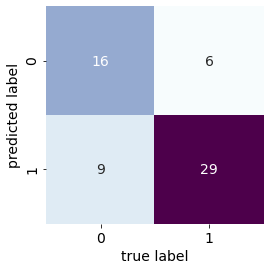

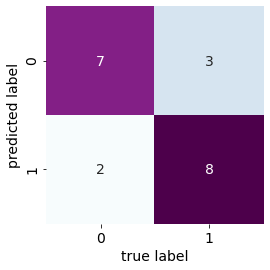

In [348]:
print("Accuracy Report for Training")
y_pred_train = prediction(model, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)
print('--------------------------------------------------------')
print("Accuracy Report for Testing")
y_pred_test = prediction(model, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

y_prob_mixed = model.predict_proba(x_test)[:,1]

# 3. ROC AUC Curves

https://inblog.in/AUC-ROC-score-and-curve-in-multiclass-classification-problems-2ja4jOHb2X
https://stackoverflow.com/questions/52373318/how-to-compare-roc-auc-scores-of-different-binary-classifiers-and-assess-statist

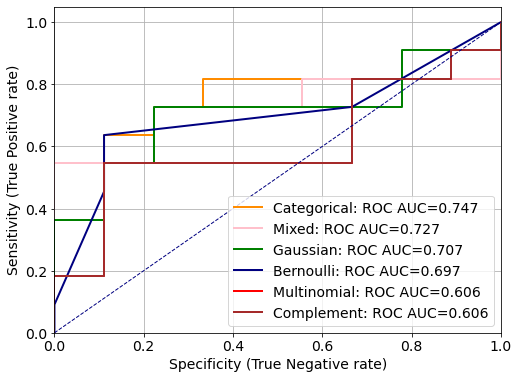

In [351]:
import matplotlib

x_train, x_test, y_train, y_test = \
        model_selection.train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()

#Categorical
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_categorical)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Categorical: ROC AUC={0:.3f}'.format(roc_auc))

#Mixed
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_mixed)
plt.plot(fpr, tpr, color='Pink', lw=2,
         label='Mixed: ROC AUC={0:.3f}'.format(roc_auc))

#Gaussian
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_gaussian)
plt.plot(fpr, tpr, color='green', lw=2,
         label='Gaussian: ROC AUC={0:.3f}'.format(roc_auc))

#Bernoulli
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_bernoulli)
plt.plot(fpr, tpr, color='navy', lw=2,
         label='Bernoulli: ROC AUC={0:.3f}'.format(roc_auc))

#Multinomial
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_multinomial)
plt.plot(fpr, tpr, color='red', lw=2,
         label='Multinomial: ROC AUC={0:.3f}'.format(roc_auc))

#Complement
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_complement)
plt.plot(fpr, tpr, color='brown', lw=2,
         label='Complement: ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (True Negative rate)')
plt.ylabel('Sensitivity (True Positive rate)')
plt.show()